In [1]:
# import package python yang akan digunakan
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])

In [2]:
# import data
df_nba = pd.read_csv("dataset/nbaallelo.csv")
df_nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [5]:
# tim TRH biasanya skor berapa di 1 game?
# ambil data tim TRH dulu
df_trh = df_nba[df_nba["team_id"]=="TRH"]

# ambil data pts saja
df_trh_pts = df_trh[["pts"]]
print(df_trh_pts.shape)
df_trh_pts

(60, 1)


,pts
0,66
10,60
24,73
26,54
49,85
50,49
64,48
69,72
83,83
91,50


<AxesSubplot:ylabel='Frequency'>

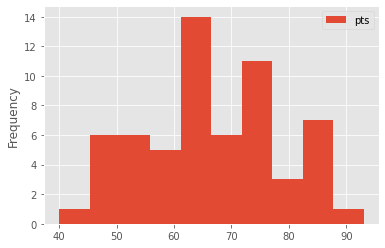

In [6]:
# untuk melihat distribusi datanya, kita gunakan histogram
df_trh_pts.plot(kind="hist")

In [7]:
# pakai numpy untuk hitung pembatas "bin" di angka berapa saja
np.histogram(df_trh_pts)

(array([ 1,  6,  6,  5, 14,  6, 11,  3,  7,  1], dtype=int64),
 array([40. , 45.3, 50.6, 55.9, 61.2, 66.5, 71.8, 77.1, 82.4, 87.7, 93. ]))

In [8]:
freq, bin_edges = np.histogram(df_trh_pts)
print(freq)
print(bin_edges)

[ 1  6  6  5 14  6 11  3  7  1]
[40.  45.3 50.6 55.9 61.2 66.5 71.8 77.1 82.4 87.7 93. ]


<AxesSubplot:ylabel='Frequency'>

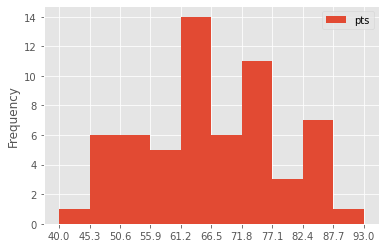

In [9]:
df_trh_pts.plot(kind="hist", xticks=bin_edges)

<AxesSubplot:ylabel='Frequency'>

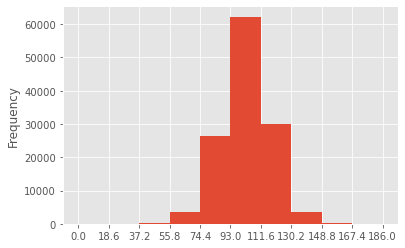

In [12]:
# bandingkan dengan selurah data tim NBA, apakah tim TRH termasuk bagus?
data = df_nba["pts"]

freq, bin_edges = np.histogram(data)

data.plot(kind="hist", xticks=bin_edges)

Text(0.5, 0, 'pts')

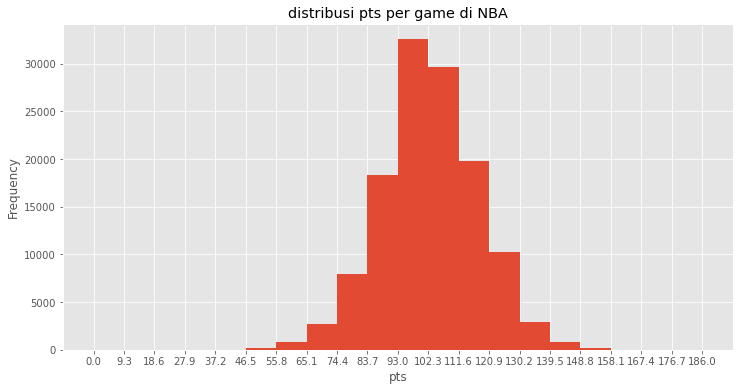

In [15]:
# kita bisa edit jumlah bins nya sesuai yang kita mau, misalnya 20 bin
n = 20
data = df_nba["pts"]

freq, bin_edges = np.histogram(data, bins=n)

data.plot(figsize=(12,6), kind="hist", xticks=bin_edges, bins=n)

plt.title("distribusi pts per game di NBA")
plt.xlabel("pts")

Text(0.5, 0, 'pts')

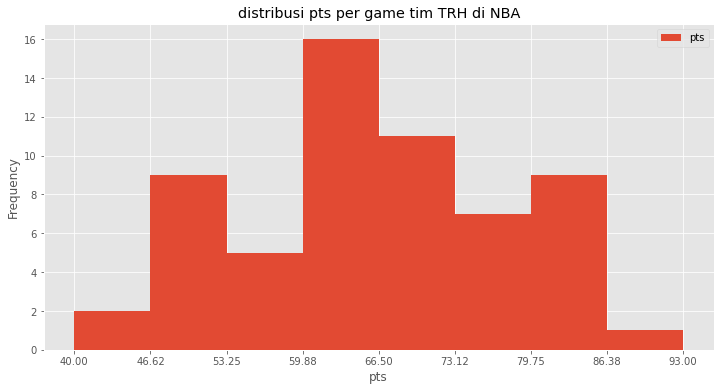

In [24]:
n = 8
data = df_trh_pts

freq, bin_edges = np.histogram(data, bins=n)

data.plot(figsize=(12,6), kind="hist", xticks=bin_edges, bins=n)

plt.title("distribusi pts per game tim TRH di NBA")
plt.xlabel("pts")